## In this Project We will Have our Eyes on Two parts i.e(Part1,Part2)

 This is the Part -1   of **Data** visualization of our Malaria_detection dataset w.r.t to images ,Visualized in different Prospectives W.r.t to the Data Exploration Coded in a very simple manner ,A Sweetviz Data-visualization Report has also been Created for Better Understanding Aspects.


In [ ]:
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [ ]:

df= tfds.load("malaria",split = "train",as_supervised = True)#loaded the data using TensorFlow

In [ ]:
array_images = []
array_labels = []
for images,labels in tfds.as_numpy(df):
    array_images.append(images)
    array_labels.append(labels)


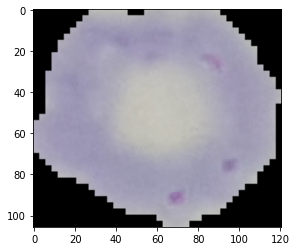

In [ ]:
plt.imshow(array_images[1])

In [ ]:
print("Number of images:",len(array_images))
print("shape of the image:",
      array_images[1].shape)



Number of images: 27558
shape of the image: (106, 121, 3)


In [ ]:
""" lets try to Resize one particular  image """
size = (32,32)

(32, 32, 3)


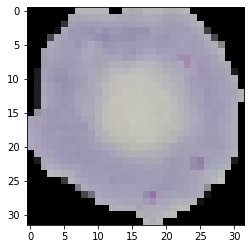

In [ ]:
image = cv2.resize(array_images[1],size)
plt.imshow(image)
print(image.shape)

In [ ]:
image=cv2.resize(array_images[1],size).T[0].T

(32, 32)

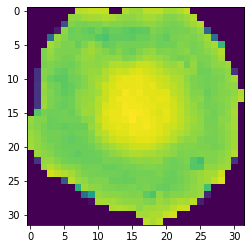

In [ ]:
plt.imshow(image)
image.shape

In [ ]:
""" Resizing all the images """#using Lambda function
#array_images = np.array(list(map(lambda image:image=cv2.resize(array_images[1],size).T[0].T))) 


' Resizing all the images '

In [ ]:
image.shape

(32, 32)

In [ ]:
array_images=np.array(list(map(lambda image: (cv2.resize(image,size)).T[0].T , array_images)))
F_images  = np.array(list(map(lambda image:image.flatten(),array_images)))

In [ ]:
print("array_images_shape:",array_images.shape)
print("flattend_images_shape:",F_images.shape)

array_images_shape: (27558, 32, 32)
flattend_images_shape: (27558, 1024)


# Considering 100% of the data

In [ ]:
Full_dt = pd.DataFrame(F_images)
Full_dt['label'] = array_labels 

In [ ]:
Full_dt.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
0,0,0,0,0,0,0,82,193,193,194,194,193,192,191,192,193,196,198,194,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,192,191,191,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,180,181,184,183,183,0,0,177,172,172,181,181,181,174,174,177,183,0,0,0,0,0,0,0,0,0,0,0,0,0,0,168,167,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,181,175,182,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,226,226,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,214,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,196,215,215,216,216,217,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,127,190,188,188,188,187,188,189,189,128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,218,218,219,217,215,216,144,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
Full_dt.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
0,1.000000,0.395033,0.200158,0.135204,0.058454,0.058861,0.046169,0.034841,0.035751,0.018937,0.009763,0.003471,-0.004748,-0.012087,-0.012759,-0.015197,-0.013775,-0.004464,-0.007460,-0.009322,-0.006635,-0.004070,-0.000134,0.001870,0.003731,0.006535,0.009401,0.013716,0.010221,-0.001011,-0.000769,-0.000324,0.364746,0.149123,0.126742,0.094515,0.045151,0.040517,0.027923,0.024945,...,-0.005911,-0.004752,-0.003583,-0.002587,-0.001890,-0.001321,-0.000611,-0.000288,-0.000631,-0.001019,-0.001241,0.027949,0.020046,0.017681,0.010110,0.007340,0.004687,0.001270,-0.002317,-0.005306,0.000695,-0.005495,-0.005447,-0.007300,-0.001291,0.002011,-0.000012,-0.001717,-0.006150,-0.005608,-0.004040,-0.003302,-0.002867,-0.002234,-0.001745,-0.001311,-0.000908,-0.000599,-0.000265,-0.005626
1,0.395033,1.000000,0.495490,0.256402,0.120322,0.080420,0.044275,0.041396,0.022749,0.006490,-0.003511,-0.009645,-0.017325,-0.023504,-0.030300,-0.029152,-0.030376,-0.026850,-0.024099,-0.021462,-0.016254,-0.009571,-0.003855,-0.000329,-0.001826,0.001015,0.003906,0.007816,0.005664,-0.002125,0.011485,0.030692,0.490115,0.496297,0.352355,0.221618,0.127842,0.074080,0.045545,0.020990,...,0.010689,0.002306,0.004477,0.010248,0.008559,0.011166,-0.001285,-0.000605,-0.001326,-0.002143,-0.002609,0.022030,0.014669,0.009017,0.001275,-0.003076,-0.002650,-0.005728,-0.006609,-0.011321,-0.003421,-0.005731,-0.003425,-0.001348,0.006122,0.006100,0.012207,0.012155,0.009777,0.005260,0.008763,0.008693,-0.001689,0.009223,0.009780,0.017047,0.024797,-0.001260,-0.000557,0.002552
2,0.200158,0.495490,1.000000,0.605238,0.287305,0.183815,0.109656,0.070842,0.036864,0.022704,0.009459,-0.005282,-0.016105,-0.027823,-0.037808,-0.040814,-0.040541,-0.039935,-0.035975,-0.028817,-0.021671,-0.011221,-0.003169,0.002187,0.005821,-0.000717,0.002960,0.002597,0.001634,-0.003101,0.018863,0.049825,0.393657,0.655007,0.532706,0.382731,0.251908,0.149914,0.093022,0.054878,...,0.014737,0.013625,0.011558,0.014165,0.007504,0.009281,-0.001876,-0.000884,-0.001935,-0.003127,-0.003807,0.003709,-0.000011,-0.004538,-0.004299,-0.008205,-0.005372,-0.003803,-0.003745,-0.015098,-0.015732,-0.022227,-0.021510,-0.016018,-0.004363,0.004920,0.010730,0.017096,0.022155,0.022901,0.023592,0.021583,0.005011,0.004501,0.007440,0.014212,0.015252,0.000720,-0.000813,-0.012225
3,0.135204,0.256402,0.605238,1.000000,0.578690,0.334360,0.198094,0.123543,0.081295,0.047291,0.022025,0.001950,-0.020058,-0.035091,-0.048304,-0.050972,-0.052977,-0.053143,-0.048045,-0.038847,-0.031052,-0.020141,-0.010333,-0.005362,-0.000108,-0.004024,-0.000006,-0.000742,-0.000977,-0.004030,0.003825,0.015210,0.260899,0.538126,0.622024,0.514499,0.366529,0.244585,0.159098,0.101287,...,0.036268,0.041660,0.041737,0.027809,0.020630,0.022303,-0.002437,-0.001148,0.000505,0.004442,0.002196,0.005333,0.006141,0.001610,0.002109,-0.002858,-0.008195,-0.011807,-0.012052,-0.020567,-0.026177,-0.032142,-0.028496,-0.020442,-0.011595,0.000977,0.006403,0.013624,0.023459,0.035489,0.056265,0.053889,0.029346,0.026917,0.017847,0.007973,0.002189,0.004146,-0.001057,-0.022345
4,0.058454,0.120322,0.287305,0.578690,1.000000,0.603011,0.355410,0.208938,0.132006,0.078869,0.035313,0.010334,-0.023282,-0.039205,-0.054491,-0.061007,-0.064901,-0.060941,-0.054462,-0.044623,-0.034314,-0.024863,-0.014432,-0.009413,-0.006205,-0.004154,-0.000332,-0.003945,-0.003503,-0.005142,-0.003685,-0.001105,0.111600,0.288158,0.531177,0.572998,0.488896,0.359640,0.249132,0.165998,...,0.059262,0.062264,0.051850,0.024889,0.020387,0.019227,-0.003110,-0.001465,0.005475,0.005488,0.002780,-0.001784,-0.004825,-0.003911,0.003712,-0.003155,-0.001733,-0.017205,-0.015664,-0.029526,-0.027912,-0.035307,-0.033770,-0.030068,-0.019839,-0.002195,0.012577,0.0217

In [ ]:
corr = Full_dt.corr()

In [ ]:
corr.sort_values( by = ['label'],axis=1)#feature_number 932 has less correlation than other features as respectively they are sorted above

,932,966,769,965,68,899,99,900,37,801,867,100,833,933,866,222,38,124,834,57,157,67,69,999,131,802,892,162,156,967,923,737,893,931,985,193,954,36,91,955,...,18,49,510,481,353,50,354,606,44,542,1006,449,322,417,48,447,1009,47,574,13,416,607,544,45,46,385,1007,448,479,14,480,1008,17,512,575,543,16,511,15,label
0,0.006580,0.002972,0.007199,0.006950,0.040840,0.004522,0.039120,0.002762,0.040517,0.005424,0.002772,0.021310,-0.000982,0.005157,0.004824,0.006425,0.027923,-0.000875,0.001212,-0.001959,-0.000567,0.063766,0.031769,0.010110,0.013228,0.000648,-0.006615,0.009946,-0.004760,0.001504,-0.007731,0.005399,-0.005467,0.009175,-0.005911,0.002405,-0.006901,0.045151,-0.000463,-0.005446,...,-0.007460,-0.024169,-0.015702,-0.010467,-0.013020,-0.020146,-0.023396,-0.005050,-0.014277,-0.006354,-0.005495,-0.018137,-0.021401,-0.018086,-0.030256,-0.009537,-0.001291,-0.030438,-0.005647,-0.012087,-0.009367,0.005822,-0.012073,-0.018807,-0.034855,-0.016280,-0.005447,-0.011252,-0.003057,-0.012759,-0.011619,-0.007300,-0.004464,-0.011878,0.005142,0.006590,-0.013775,-0.002868,-0.015197,-0.005626
1,0.007717,0.000552,0.005298,0.004790,0.104825,0.005674,0.113561,0.004170,0.074080,0.004563,0.000024,0.068300,0.007610,-0.000946,0.006680,-0.001763,0.045545,-0.003324,0.001579,-0.010289,-0.003351,0.163026,0.060753,0.001275,0.072176,-0.000436,0.009691,0.054999,-0.009186,-0.007056,0.009952,-0.003076,0.003534,0.011901,0.010689,0.043036,0.005960,0.127842,-0.006531,0.011808,...,-0.024099,-0.058201,-0.013268,-0.042858,-0.033184,-0.052576,-0.046037,-0.011248,-0.042731,-0.009843,-0.005731,-0.051063,-0.032226,-0.045300,-0.060731,-0.008568,0.006122,-0.060035,-0.006884,-0.023504,-0.022287,0.001402,-0.023628,-0.050213,-0.058760,-0.040361,-0.003425,-0.028977,-0.005886,-0.030300,-0.030751,-0.001348,-0.026850,-0.028837,-0.004598,-0.007960,-0.030376,-0.012431,-0.029152,0.002552
2,-0.002117,-0.008597,-0.001103,-0.005135,0.174715,-0.006640,0.179505,-0.007240,0.149914,0.003010,-0.006074,0.115247,0.006231,-0.009461,0.000676,-0.006309,0.093022,-0.009971,0.000042,-0.008394,-0.006728,0.254122,0.110222,-0.004299,0.121193,-0.006806,0.024234,0.105756,-0.009667,-0.015288,0.025029,-0.016490,0.014145,-0.002298,0.014737,0.081677,0.017559,0.251908,-0.011726,0.015094,...,-0.035975,-0.078206,-0.019698,-0.071146,-0.032070,-0.076107,-0.043779,-0.005608,-0.045462,-0.014077,-0.022227,-0.073250,-0.026317,-0.070893,-0.084461,-0.022855,-0.004363,-0.083983,-0.009165,-0.027823,-0.027764,0.004005,-0.038082,-0.064471,-0.074887,-0.056743,-0.021510,-0.037380,-0.020263,-0.037808,-0.039879,-0.016018,-0.039935,-0.040366,-0.005298,-0.015260,-0.040541,-0.019363,-0.040814,-0.012225
3,-0.006394,-0.010492,-0.010053,-0.004372,0.240655,-0.008552,0.233098,-0.014134,0.244585,-0.007508,-0.011188,0.158962,-0.003562,-0.011353,-0.007040,-0.010717,0.159098,-0.013491,-0.010451,-0.014702,-0.010714,0.334084,0.164070,0.002109,0.152743,-0.016313,0.041205,0.145670,-0.014961,-0.016972,0.040492,-0.024626,0.036184,-0.004193,0.036268,0.130812,0.040169,0.366529,-0.015649,0.039025,...,-0.048045,-0.101877,-0.039806,-0.078538,-0.019569,-0.095275,-0.025937,-0.015629,-0.053553,-0.033043,-0.032142,-0.074181,-0.005520,-0.064446,-0.106496,-0.027533,-0.011595,-0.097600,-0.029239,-0.035091,-0.036020,0.001003,-0.046235,-0.077472,-0.091050,-0.048207,-0.028496,-0.044654,-0.030827,-0.048304,-0.048761,-0.020442,-0.053143,-0.046775,-0.015649,-0.024797,-0.052977,-0.026406,-0.050972,-0.022345
4,-0.010224,-0.007490,-0.018661,-0.007560,0.305157,-0.012899,0.285504,-0.013941,0.359640,-0.013719,-0.013545,0.199012,-0.010685,-0.012355,-0.012024,-0.015437,0.249132,-0.013129,-0.016383,-0.024932,-0.014501,0.397772,0.218552,0.003712,0.187640,-0.026775,0.059109,0.182249,-0.021845,-0.013063,0.064915,-0.032309,0.052760,-0.010090,0.059262,0.182993,0.063674,0.488896,-0.018680,0.064797,...,-0.054462,-0.116127,-0.049845,-0.085297,-0.005227,-0.110629,-0.010332,-0.007936,-0.045071,-0.036432,-0.035307,-0.072648,0.005871,-0.051514,-0.118220,-0.036351,-0.019839,-0.109013,-0.02

In [ ]:
corr = Full_dt.corr()['label'][:-1]

In [ ]:
corr= abs(corr)#taking aboslute correaltion

In [ ]:
corr#considering only the corelation between pixels

0       0.005626
1       0.002552
2       0.012225
3       0.022345
4       0.028792
          ...   
1019    0.023396
1020    0.010234
1021    0.000860
1022    0.005839
1023    0.000111
Name: label, Length: 1024, dtype: float64

In [ ]:
  corr_median  = np.median(corr)


In [ ]:
print(corr_median)

0.020330524371064772


checking the correlation which is greater than our meidan value
 

In [ ]:
col_index_cor = ['label']
for i in range(len(corr)):   
  if corr[i] > corr_median:
     col_index_cor.append(i)

In [ ]:
col_index_cor# so these are the ones which are greater than our median value showing more impact on the target

['label',
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 22,
 23,
 24,
 25,
 26,
 27,
 34,
 35,
 36,
 37,
 38,
 39,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 65,
 66,
 67,
 68,
 69,
 70,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 89,
 90,
 91,
 92,
 93,
 96,
 97,
 98,
 99,
 100,
 101,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 122,
 123,
 124,
 125,
 126,
 128,
 129,
 130,
 131,
 132,
 134,
 135,
 136,
 137,
 138,
 148,
 149,
 150,
 151,
 152,
 153,
 155,
 156,
 157,
 158,
 160,
 161,
 162,
 163,
 165,
 166,
 167,
 168,
 181,
 182,
 183,
 184,
 185,
 186,
 188,
 189,
 190,
 191,
 192,
 193,
 196,
 197,
 198,
 199,
 215,
 216,
 217,
 218,
 219,
 221,
 222,
 223,
 224,
 225,
 227,
 228,
 229,
 230,
 248,
 249,
 250,
 251,
 252,
 254,
 255,
 256,
 258,
 259,
 260,
 261,
 281,
 282,
 283,
 284,
 285,
 287,
 289,
 290,
 291,
 292,
 314,


In [ ]:

""" lets checkout the central tendency of our full_data with all features"""
images_data = Full_dt.drop("label",axis=1)

In [ ]:
images_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,82,193,193,194,194,193,192,191,192,193,196,198,194,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,192,191,191,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,180,181,184,183,183,0,0,177,172,172,181,181,181,174,174,177,183,0,0,0,0,0,0,0,0,0,0,0,0,0,0,168,167,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,181,175,182,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,226,226,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,214,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,196,215,215,216,216,217,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,127,190,188,188,188,187,188,189,189,128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,218,218,219,217,215,216,144,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
images_data[6]

0         82
1          0
2          0
3          0
4          0
        ... 
27553      0
27554      0
27555    115
27556      0
27557      0
Name: 6, Length: 27558, dtype: uint8

In [ ]:
 images_data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
27553,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,180,174,177,175,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,173,172,173,171,172,171,170,173,13,0,0,0,0,0,0,0,0,0,0
27554,0,0,0,0,0,0,0,0,0,0,0,0,0,0,196,193,0,189,188,189,188,194,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,197,197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27555,0,0,0,0,0,0,115,223,221,221,221,223,221,221,219,221,0,169,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,69,223,222,221,...,223,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,224,219,221,221,221,220,221,222,221,221,223,0,0,0,0,0,0,0,0,0
27556,0,0,0,0,0,0,0,0,0,0,0,0,0,0,191,188,191,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,188,0,187,186,186,33,0,0,0,0,0,0,0,0,0,0
27557,0,0,0,0,0,0,0,0,0,0,27,220,224,223,218,217,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,207,208,207,208,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
images_data.shape

(27558, 1024)

In [ ]:
full_dt_mean = np.mean(images_data,axis = 0) #axis==None by default, which computes the mean value over the flattened array) , in which axis=0 along the rows (namely, index in pandas), and axis=1 along the columns.

In [ ]:
full_dt_mean

0       0.063575
1       0.291930
2       0.627839
3       1.063902
4       1.753284
          ...   
1019    1.545649
1020    0.871326
1021    0.410625
1022    0.173634
1023    0.036287
Length: 1024, dtype: float64

### Central Tendency of full data

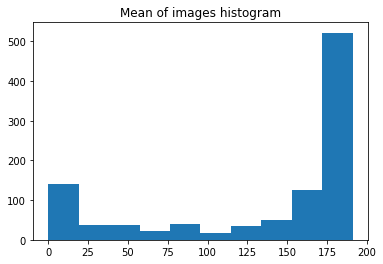

In [ ]:
plt.hist(full_dt_mean)
plt.title("Mean of images histogram")
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


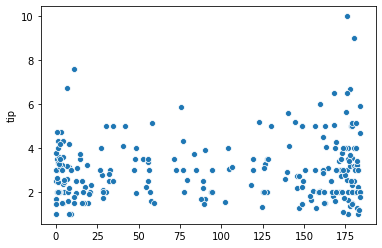

In [ ]:

import seaborn as sns
tips = sns.load_dataset("tips")
ax = sns.scatterplot(x = full_dt_mean, y="tip", data=tips)

In [ ]:
median_values_Full=np.median(images_data, axis=0)

In [ ]:
max(median_values_Full)

196.0

### Taking histogram of median

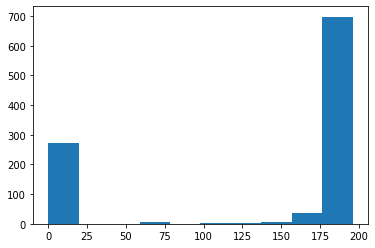

In [ ]:
plt.hist(median_values_Full)#max value is 196
plt.show()

# Consodering the 50% of the data

In [ ]:
half_data = Full_dt.loc[:,col_index_cor]# making the data spearted by which is having more correlation than our medain value of full_dataset

In [ ]:
half_data.head()#the features which are having much impact on the target

,label,3,4,5,6,7,8,9,12,13,14,15,16,17,18,19,22,23,24,25,26,27,34,35,36,37,38,39,42,43,44,45,46,47,48,49,50,51,52,53,...,967,968,971,972,973,974,975,976,977,978,979,980,981,983,984,985,986,987,988,996,997,998,999,1000,1001,1002,1004,1005,1006,1007,1008,1009,1010,1011,1014,1015,1016,1017,1018,1019
0,1,0,0,0,82,193,193,194,192,191,192,193,196,198,194,0,0,0,0,0,0,0,0,0,0,192,191,191,188,187,187,187,190,188,190,192,193,196,197,0,...,0,0,0,0,204,204,202,204,205,204,208,209,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0
1,1,0,0,0,0,180,181,184,0,0,177,172,172,181,181,181,177,183,0,0,0,0,0,0,0,0,168,167,173,176,175,170,168,166,170,173,173,170,164,163,...,0,0,0,0,0,0,0,175,173,176,176,183,187,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,181,175,182,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,215,0,190,201,211,218,0,0,0,...,179,228,234,228,231,227,228,226,225,224,220,0,0,0,0,0,0,0,0,0,0,0,0,0,0,226,7,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,139,214,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,200,207,122,121,202,200,203,120,156,203,28,...,0,0,207,207,206,208,208,208,208,212,212,214,216,129,0,0,0,0,0,0,0,0,0,0,0,0,215,215,216,216,217,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,190,188,188,188,187,188,189,189,0,0,0,0,0,0,0,0,0,0,0,0,187,184,185,183,185,183,183,183,183,184,185,187,...,0,0,37,213,214,214,212,214,216,216,213,213,215,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,218,218,219,217,215,216,0,0,0,0,0,0


In [ ]:
images_data_1 = half_data.drop("label",axis=1)

In [ ]:
images_data_1

,3,4,5,6,7,8,9,12,13,14,15,16,17,18,19,22,23,24,25,26,27,34,35,36,37,38,39,42,43,44,45,46,47,48,49,50,51,52,53,55,...,967,968,971,972,973,974,975,976,977,978,979,980,981,983,984,985,986,987,988,996,997,998,999,1000,1001,1002,1004,1005,1006,1007,1008,1009,1010,1011,1014,1015,1016,1017,1018,1019
0,0,0,0,82,193,193,194,192,191,192,193,196,198,194,0,0,0,0,0,0,0,0,0,0,192,191,191,188,187,187,187,190,188,190,192,193,196,197,0,0,...,0,0,0,0,204,204,202,204,205,204,208,209,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0
1,0,0,0,0,180,181,184,0,0,177,172,172,181,181,181,177,183,0,0,0,0,0,0,0,0,168,167,173,176,175,170,168,166,170,173,173,170,164,163,171,...,0,0,0,0,0,0,0,175,173,176,176,183,187,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,181,175,182,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,215,0,190,201,211,218,0,0,0,0,...,179,228,234,228,231,227,228,226,225,224,220,0,0,0,0,0,0,0,0,0,0,0,0,0,0,226,7,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,139,214,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,200,207,122,121,202,200,203,120,156,203,28,0,...,0,0,207,207,206,208,208,208,208,212,212,214,216,129,0,0,0,0,0,0,0,0,0,0,0,0,215,215,216,216,217,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,190,188,188,188,187,188,189,189,0,0,0,0,0,0,0,0,0,0,0,0,187,184,185,183,185,183,183,183,183,184,185,187,33,...,0,0,37,213,214,214,212,214,216,216,213,213,215,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,218,218,219,217,215,216,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27553,0,0,0,0,0,0,0,0,0,0,0,0,0,0,180,175,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,6,6,171,170,171,168,171,...,0,0,170,167,167,164,167,165,165,164,164,164,163,8,5,0,0,0,0,0,0,0,0,0,0,0,0,173,172,173,171,172,171,170,0,0,0,0,0,0
27554,0,0,0,0,0,0,0,0,0,196,193,0,189,188,189,18,0,0,0,0,0,0,0,0,0,0,0,0,196,192,185,183,185,184,184,183,181,181,185,193,...,0,0,199,196,192,192,192,191,196,196,199,200,198,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,197,197,0,0,0,0,0,0,0,0,0,0
27555,0,0,0,115,223,221,221,221,221,219,221,0,169,0,0,0,0,0,0,0,0,0,0,69,223,222,221,218,220,219,220,218,219,220,220,221,69,69,69,0,...,0,0,220,220,218,217,219,218,217,220,218,218,218,222,223,36,0,0,0,0,0,0,0,0,0,0,224,219,221,221,221,220,221,222,223,0,0,0,0,0
27556,0,0,0,0,0,0,0,0,0,191,188,191,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33,188,188,187,184,182,187,187,190,0,0,0,0,...,0,0,0,0,0,184,181,181,178,180,178,179,182,188,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,188,0,187,186,0,0,0,0,0,0


Central tendency of half data


In [ ]:
mean_images_1 = np.mean(images_data_1)

In [ ]:
mean_images_1

3        1.063902
4        1.753284
5        2.827854
6        4.705458
7        7.715291
          ...    
1015    10.794905
1016     6.590101
1017     4.201321
1018     2.561507
1019     1.545649
Length: 512, dtype: float64

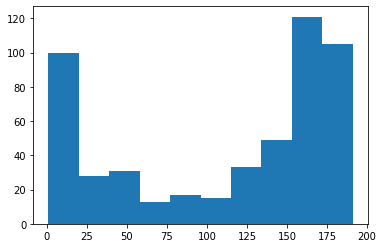

In [ ]:
plt.hist(mean_images_1)
plt.show()

In [ ]:
median_images_1 = np.median(images_data_1,axis=0)

In [ ]:
max(median_images_1)

196.0

(array([188.,   1.,   0.,   0.,   0.,   2.,   2.,   6.,  36., 277.]),
 array([  0. ,  19.6,  39.2,  58.8,  78.4,  98. , 117.6, 137.2, 156.8,
        176.4, 196. ]),
 <a list of 10 Patch objects>)

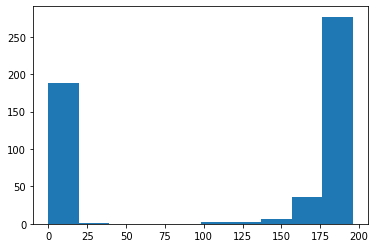

In [ ]:
plt.hist(median_images_1)

In [ ]:
!pip install sweetviz

# **Creating a Sweetviz Report for Better visulaisation**

In [ ]:
import sweetviz

In [ ]:
corr

0       0.005626
1       0.002552
2       0.012225
3       0.022345
4       0.028792
          ...   
1019    0.023396
1020    0.010234
1021    0.000860
1022    0.005839
1023    0.000111
Name: label, Length: 1024, dtype: float64

In [ ]:
k = np.percentile(corr,90)

In [ ]:
print(k)

0.054000140967729635


In [ ]:
col_selected_index=['label']  
for i in range(len(corr)):
  if corr[i]>=k:
    col_selected_index.append(i)


In [ ]:
col_selected_index#so these are the pixel intensiy values indexes having 90% effect on the target

['label',
 13,
 14,
 15,
 16,
 17,
 18,
 37,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 68,
 74,
 75,
 76,
 83,
 84,
 85,
 86,
 99,
 100,
 104,
 118,
 119,
 185,
 197,
 218,
 227,
 228,
 251,
 259,
 290,
 291,
 322,
 349,
 353,
 354,
 381,
 382,
 384,
 385,
 386,
 414,
 415,
 416,
 417,
 446,
 447,
 448,
 449,
 478,
 479,
 480,
 481,
 510,
 511,
 512,
 513,
 542,
 543,
 544,
 545,
 574,
 575,
 576,
 577,
 606,
 607,
 637,
 638,
 669,
 701,
 732,
 769,
 801,
 833,
 867,
 888,
 899,
 900,
 932,
 948,
 949,
 965,
 966,
 973,
 974,
 975,
 976,
 977,
 978,
 979,
 1006,
 1007,
 1008,
 1009,
 1010]

In [ ]:
most_impacting_data=Full_dt.loc[:,col_selected_index]

In [ ]:
most_impacting_data#so these are the pixel intensiy values having 90% effect on the target

,label,13,14,15,16,17,18,37,43,44,45,46,47,48,49,50,51,52,68,74,75,76,83,84,85,86,99,100,104,118,119,185,197,218,227,228,251,259,290,291,...,513,542,543,544,545,574,575,576,577,606,607,637,638,669,701,732,769,801,833,867,888,899,900,932,948,949,965,966,973,974,975,976,977,978,979,1006,1007,1008,1009,1010
0,1,191,192,193,196,198,194,192,187,187,187,190,188,190,192,193,196,197,196,188,186,187,193,194,195,203,193,190,186,198,175,109,186,108,186,183,130,187,185,186,...,190,201,214,192,191,202,216,196,191,205,0,201,209,204,206,202,0,0,0,0,202,0,0,0,202,205,0,0,204,204,202,204,205,204,208,0,0,0,0,10
1,1,0,177,172,172,181,181,0,176,175,170,168,166,170,173,173,170,164,0,161,165,163,164,161,160,161,0,16,154,160,160,162,161,165,167,163,165,162,164,161,...,163,173,0,168,164,173,0,170,166,172,0,168,172,168,170,168,0,0,0,0,168,0,0,0,173,180,0,0,0,0,0,175,173,176,176,0,0,0,181,175
2,0,0,0,0,0,0,0,0,0,0,215,0,190,201,211,218,0,0,0,0,121,226,223,0,0,0,0,0,0,169,160,211,198,216,0,0,221,0,0,0,...,212,227,0,216,210,0,0,0,214,0,0,0,0,0,0,0,208,214,229,228,0,0,0,0,225,0,0,0,231,227,228,226,225,224,220,0,0,0,0,0
3,1,0,0,139,214,0,0,0,200,207,122,121,202,200,203,120,156,203,0,200,197,197,197,198,210,0,0,0,198,208,0,204,196,201,197,197,204,198,205,196,...,203,210,0,0,206,211,0,0,209,209,0,201,212,203,205,202,0,0,0,0,206,0,0,0,205,211,0,0,206,208,208,208,208,212,212,216,216,217,0,0
4,1,188,188,188,187,188,189,0,184,185,183,185,183,183,183,183,184,185,0,184,180,178,185,184,185,187,0,0,181,180,180,174,186,178,189,182,179,186,189,183,...,186,185,189,0,190,185,195,0,191,191,110,189,196,196,202,203,0,0,0,0,219,0,0,0,205,203,0,0,214,214,212,214,216,216,213,218,218,219,217,215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27553,0,0,0,0,0,0,0,0,0,0,0,1,6,6,6,171,170,171,0,130,130,130,163,161,164,162,0,0,176,160,161,157,169,160,174,169,162,172,176,170,...,168,167,176,0,168,165,176,0,169,165,177,163,168,162,165,163,0,0,0,0,159,0,0,0,161,159,0,0,167,164,167,165,165,164,164,172,173,171,172,171
27554,1,0,196,193,0,189,188,0,196,192,185,183,185,184,184,183,181,181,0,192,187,181,184,182,182,182,0,0,193,184,186,183,192,181,0,182,184,192,192,185,...,187,197,0,192,187,118,0,193,186,118,0,202,0,0,0,201,177,114,0,0,193,0,0,0,194,196,0,0,192,192,192,191,196,196,199,197,197,0,0,0
27555,1,221,219,221,0,169,0,223,220,219,220,218,219,220,220,221,69,69,220,217,217,218,217,217,222,222,218,215,217,219,218,217,215,218,217,217,219,215,217,215,...,219,217,220,0,221,219,219,0,160,219,0,219,217,217,218,217,0,0,0,0,217,0,0,0,217,219,0,0,218,217,219,218,217,220,218,221,221,221,220,221
27556,1,0,191,188,191,0,0,0,188,188,187,184,182,187,187,190,0,0,0,184,184,182,186,188,189,193,0,0,186,183,188,187,184,186,85,184,186,183,184,182,...,182,186,194,0,181,184,193,186,181,189,0,180,190,182,183,180,0,0,0,0,179,0,0,0,177,176,0,0,0,184,181,181,178,180,178,0,0,188,0,187


In [ ]:
final_report = sweetviz.analyze([most_impacting_data,"Malaria DATA"],target_feat = "label")

:FEATURES DONE:                    |█████████████████████| [100%]   01:14  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:11  -> (00:00 left)


Creating Associations graph... DONE!


In [ ]:
final_report.show_html(filepath='Malaria_SWEETVIZ_REPORT_20.html')